# Exercise 1 of Week 1 Assignement
Consider the text available in this website
http://shakespeare.mit.edu/allswell/full.html- to answer the following questions
- (a) Find the frequency the word "BERTRAM" (all in caps, ignore font
types such as bold, italics, etc.) that appears at the start of the
sentence?
- (b) Is the ratio of the frequency of
\begin{equation*}
\frac{BERTRAN}{Bertran}>0
\end{equation*}
- (c) What is the average sentence length of this document?
- (d) What is the vocabulary (unique set of words) size? Ignore alpha-
numeric and numeric terms, if available
- (e) Find the total count of the words that end with the exclamation
mark(!)

In [1]:
import re
import urllib.request
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize # for spliting the text into words
from nltk.tokenize import sent_tokenize # for splitting the text into sentences
from nltk.tokenize import RegexpTokenizer # for extracting text ending with !
from nltk.corpus import inaugural # for average sentence length

## Download the Text

In [2]:
url = 'http://shakespeare.mit.edu/allswell/full.html'
html = urllib.request.urlopen(url).read().decode('utf-8')
soup = BeautifulSoup(html)
raw = BeautifulSoup(html, 'html.parser').get_text()
raw[:20]

#with open("text.txt", "w") as file:
#    file.write(raw)

"\n\n\nAll's Well That E"

## Preprocess the Text

### Split the text into tokens

In [3]:
# word tokens
word_tokens = word_tokenize(raw)
sentence_tokens = sent_tokenize(raw)

In [4]:
len(word_tokens)

29364

In [5]:
len(sentence_tokens)

1442

### Use NLTK Text to have only valid tokens

In [6]:
text = nltk.Text(word_tokens)

In [7]:
# (a) Find the frequency the word "BERTRAM" (all in caps, ignore font types such as bold, italics, etc.) that appears at the start of the sentence?
text.count('BERTRAM')

127

In [8]:
# (b) Is the ratio of the frequency of BERTRAN Bertram
text.count('BERTRAM') / text.count('Bertram')

18.142857142857142

In [9]:
# (c) What is the average sentence length of this document?
total_len = 0
total_sent = 0
for sent in sentence_tokens:
    #print(sent)
    total_len += len(sent)
    total_sent += 1

print("total_len = {0}, total_sent = {1} , Avg Sent Len = {2}".format(total_len, total_sent, total_len / total_sent))

total_len = 129890, total_sent = 1442 , Avg Sent Len = 90.07628294036061


In [10]:
# (d) What is the vocabulary (unique set of words) size? Ignore alpha- numeric and numeric terms, if available
vocab = [v.lower() for v in text.vocab() if v.isalpha()]
vocab = set(vocab)
print(len(vocab))
#print(vocab)

3299


In [11]:
# This method doesn't work as expected

# (e) Find the total count of the words that end with the exclamation mark(!)
#TokenSearcher(raw).findall(r'<^[a-z][A-Z]+!>')
# print(len(TokenSearcher(raw).findall(r'[A-Z][a-z]\w*!')))

In [12]:
# (e) Find the total count of the words that end with the exclamation mark(!)
regex_tokenizer = RegexpTokenizer('\w+!')
regex_tokens = regex_tokenizer.tokenize(raw)
print(len(regex_tokens), regex_tokens)

131 ['tis!', 'living!', 'shape!', 'birthright!', 'head!', 'him!', 'you!', 'all!', 'queen!', 'monarch!', 'up!', 't!', 't!', 't!', 'well!', 'too!', 'soldiership!', 'him!', 'year!', 'done!', 'maiden!', 'mother!', 'not!', 'me!', 'mistress!', 'dies!', 'majesty!', 'us!', 'wars!', 'with!', 'Parolles!', 'novices!', 'ho!', 'court!', 'court!', 'sir!', 'sir!', 'sir!', 'sir!', 'sir!', 'sir!', 'sir!', 'sir!', 'vinaigre!', 'please!', 'one!', 'love!', 'grant!', 'vows!', 'wed!', 'liege!', 'wife!', 'ever!', 'Recantation!', 'lord!', 'master!', 'master!', 'hen!', 'lord!', 'ever!', 'me!', 'wars!', 'wars!', 'war!', 'quickly!', 'quickly!', 'lady!', 'Away!', 'coragio!', 'lady!', 'wife!', 'near!', 'wife!', 'lord!', 'day!', 'mistress!', 'Alas!', 'words!', 'hark!', 'him!', 'pilgrim!', 'you!', 'lady!', 'else!', 'drum!', 'you!', 'carrier!', 'monsieur!', 'lost!', 'soldiers!', 'ho!', 'ransom!', 'O!', 'pray!', 'live!', 'addition!', 'sworn!', 'me!', 'rebellion!', 'we!', 'losses!', 'tears!', 'now!', 'lord!', 'him!', '

# Exercise 2 of Week 1 Assignement - Construct the binary incidence matrix
Construct the binary incidence matrix using the features extracted from the corpus.
The corpus (271 text documents) is available at
https://github.com/Ramaseshanr/anlp/blob/master/corpus/phy_corpus.txt.
It contains contains questions from Kinematics class of physics problems
sourced from the Internet
- In this assignment, you need to develop a python program that uses
the knowledge related to Kinematics and build a table similar to the
one shown below for all the documents in the corpus.
- The program should be able to read each problem, capture the known
values (such as speed=10m/s, time=5s) and fill the respective cells
in the table. For example, if you find 10 m/s for document 1, fill the
speed with value row for D1 as 1.
- Please note that problems may or may not contain all nine terms
listed.
- The corpus may contain duplicate entries
- You may use any NLTK or any equivalent APIs for this assignment

| Terms                   | D<sub>1<sub> | D<sub>2<sub> | ... | D<sub>271<sub> |
|-------------------------|----|----|-----|------|
| Speed with value        | 1  | 0  | ... | 0    |
| Distance with value     | 0  | 0  | ... | 1    |
| Acceleration with value | 0  | 0  | ... | 0    |
| Time with value         | 0  | 1  | ... | 0    |

In [13]:
import urllib.request
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer # to get Kinematics
from nltk.tokenize import sent_tokenize # to find number of sentences in this corpus
from nltk.tokenize import word_tokenize
import pandas as pd # for table creation

## Download the corpus

In [14]:
url = 'https://raw.githubusercontent.com/Ramaseshanr/anlp/master/corpus/phy_corpus.txt'

# Download the corpus as text
html = urllib.request.urlopen(url).read().decode('utf-8')
soup = BeautifulSoup(html)
raw = BeautifulSoup(html, 'html.parser').get_text()
raw[:20]

# WRITE IT TO THE FILE if required
#with open("text.txt", "w", encoding="utf-8") as file:
#    file.write(raw)

'An airplane accelera'

## Preprocess the corpus
- Each Paragraph is considered as a separate document

In [15]:
# Extract paragraphs
# Since text has indices in front of the lines, we can't use sent_tokenize()
# So splitting teh corpus into paragraphs and then I will extract kinematics from each paragraph
paragraphs = [para for para in raw.split('\n') if para]

In [16]:
# Ensure we have right number of paragraphs that is found in the corpus
len(paragraphs)

271

## Find the various kind of units found in the given Corpus

In [17]:
# Create RegEx Tokenizer which extracts the required kinematics
# Looking for 'x.xx letter' | 'x.xx word' | 'x.xx word\word'
#regex_tokenizer = RegexpTokenizer('\d+\.\d* \w |\d+\.\d* [a-z]* |\d+\.\d* [a-z]*/[a-z][0-9]* |\w\.\d+ [a-z]*')
#pattern1 = '\d+.\d+\s[a-zA-Z]*\/[a-zA-Z]*[\d]*' # x{anything}xx X/X
#pattern1 = '\d+.[\da-zA-Z]+\s[a-zA-Z]*\/[a-zA-Z]*[\d]*' # x{anything}xx X/X
pattern1 = '\d+.[\da-zA-Z]+\s[a-zA-Z]*[\/a-zA-Z\d\^\-]{1,}' # x{anything}xx X/X
pattern2 = '\d+\s[a-zA-Z]*\/[a-zA-Z]*[\d]*' # x X/X
pattern3 = '\d+.\d+\s[a-zA-Z]+' # x{anything}xx X
pattern4 = '\d+\s[a-zA-Z]+' # x XX
pattern5 = '\.\d+\s[a-zA-Z]+' # .x XX
regex_tokenizer = RegexpTokenizer(pattern1 + '|' + pattern2 + '|' + pattern3 + '|' + pattern4 + '|' + pattern5)
para_index = 0
total_tokens = 0
para_tokens = []
final_tokens = []
for paragraph in paragraphs:
    regex_tokens = regex_tokenizer.tokenize(paragraph)
    para_tokens.insert(para_index, [])
    if len(regex_tokens):
        final_tokens.extend(regex_tokens)
        para_tokens[para_index].extend(regex_tokens)
        print(para_index+1, regex_tokens)
        total_tokens += len(regex_tokens)
    para_index = para_index + 1
print('Total tokens found: ', total_tokens)
#print(final_tokens)

1 ['3.20 m/s2', '32.8 s']
2 ['5.21 seconds', '110 m']
3 ['2.60 seconds']
4 ['18.5 m/s', '46.1 m/s', '2.47 seconds']
5 ['1.40 meters', '1.67 m/s2']
6 ['444 m/s', '1.83 seconds']
7 ['7.10 m/s', '35.4 m']
8 ['3 m/s2', '65 m/s']
9 ['22.4 m/s', '2.55 s']
10 ['2.62 m']
11 ['1.29 m']
12 ['521 m/s', '0.840 m']
13 ['6.25 s']
14 ['370 m above']
15 ['367 m/s', '0.0621 m']
16 ['3.41 s']
17 ['290 m in', '3.90 m/s2']
18 ['88.3 m/s', '1365 m to']
19 ['112 m/s', '398 m']
20 ['1 m/s', '2.23 mi/hr', '91.5 m']
21 ['0.5 km', '1 hour later']
22 ['12 m/sec', '36 seconds']
23 ['2 m/s', '12 s he/she']
24 ['50 km traveling', '10 km/hr']
25 ['12 m/s', '3.00 minutes']
26 ['25 min at', '12 m/s']
27 ['3250 m/s', '10 m/s2', '215 km']
28 ['0.6 m/s2', '55 mi/h', '60 mi/h']
29 ['23.7 km/h', '0.92 m/s2', '3.6 s']
30 ['30 degree hill', '3.30 m/s2', '110 m']
31 ['48 m/s', '12 m/s', '5 s']
32 ['24 m/s', '315 m']
33 ['50 km/hr', '90 km/hr', '15 seconds']
34 ['9000 meters in', '12.12 seconds']
35 ['528 meters in', '4 second

In [18]:
def is_number_repl_dot_isdigit(s):
    '''
    replaces '.' with '' in s and
    returns the result of isdigit(s)
    https://stackoverflow.com/questions/354038/how-do-i-check-if-a-string-is-a-number-float
    '''
    return s.replace('.', '', 1).isdigit()

In [19]:
def get_tokens(final_tokens):
    '''
    Accepts list having strings
    splits into tokens separated by spaces
    and returns it as a set
    '''
    ll = []
    [ll.extend(token.split(' ')) for token in final_tokens]
    return set(ll)

In [20]:
final_tokens = get_tokens(final_tokens)
final_tokens = [s for s in final_tokens if not is_number_repl_dot_isdigit(s)]
sorted(final_tokens)

['0)above',
 '00-kg',
 '100-m',
 '100-mile',
 '10^14',
 '10^6',
 '2nd',
 '3,000',
 '3.0E8',
 '40,075',
 '5th',
 '7e6',
 '8-km',
 'Columbia',
 'Earth',
 'N',
 'Peachtree',
 'U',
 'Wichita',
 'above',
 'after',
 'ahead',
 'and',
 'angle',
 'at',
 'away',
 'before',
 'cm',
 'dash',
 'days',
 'degree',
 'degrees',
 'down',
 'drop',
 'due',
 'east',
 'feet',
 'foot',
 'for',
 'from',
 'h',
 'he/she',
 'high',
 'hill',
 'hour',
 'hours',
 'if',
 'in',
 'instead',
 'is',
 'it',
 'its',
 'kg',
 'kilograms',
 'km',
 'km/h',
 'km/hr',
 'km/s',
 'kmh',
 'later',
 'long',
 'm',
 'm/s',
 'm/s/s',
 'm/s2',
 'm/s^2',
 'm/sec',
 'meter',
 'meters',
 'meters/second',
 'metersvper',
 'mi',
 'mi/h',
 'mi/hr',
 'mile',
 'mile/minute',
 'miles',
 'min',
 'minutes',
 'more',
 'mph',
 'ms^-1',
 'near',
 'of',
 'off',
 'race',
 'reaches',
 'rest',
 'rock',
 'running',
 's',
 'sec',
 'second',
 'seconds',
 'she',
 'straight',
 't',
 'tall',
 'the',
 'then',
 'threw',
 'to',
 'towns',
 'traveling',
 'trip',
 'u

## Create the untils table based on above finding

In [21]:
speed_with_val = ['minutes', 'min', 'mi/hr', 'mi/h', 'mile/minute', 'metersvper', 'meters/second', 'm/sec', 'm/s', 'ms^-1', 'mph']
distance_with_val = ['miles', 'mile', 'meters', 'meter','m', 'feet', '-km', '-mile', '-m', 'km']
acceleration_with_val = ['km/h', 'km/hr', 'km/s', 'kmh', 'm/s2', 'm/s^2', 'm/s/s' ]
time_with_val = ['hours', 'hour', 'second', 'seconds', 'sec', 's', 'times', 'h']

## Create the table and fill it

In [22]:
column_header = ['Speed with value', 'Distance with value', 'Acceleration with value', 'Time with value']
df = pd.DataFrame(columns=column_header)

In [23]:
# loop through each paragraph tokens
para_index = 0
for tokens in para_tokens:
    tt = get_tokens(tokens)
    #print(tt)
    # loop through each token
    c1 = 0
    c2 = 0
    c3 = 0
    c4 = 0
    if any(s in tt for s in speed_with_val):
        c1 = 1
    if any(s in tt for s in distance_with_val):
        c2 = 1
    if any(s in tt for s in acceleration_with_val):
        c3 = 1
    if any(s in tt for s in time_with_val):
        c4 = 1
    #print(para_index+1, c1, c2, c3, c4)
    df = df.append(pd.Series([c1, c2, c3, c4], index=df.columns), ignore_index=True)
    para_index += 1

In [24]:
df

,Speed with value,Distance with value,Acceleration with value,Time with value
0,0,0,1,1
1,0,1,0,1
2,0,0,0,1
3,1,0,0,1
4,0,1,1,0
5,1,0,0,1
6,1,1,0,0
7,1,0,1,0
8,1,0,0,1
9,0,1,0,0


In [25]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
Speed with value,0,0,0,1,0,1,1,1,1,0,...,0,0,1,0,1,1,1,1,1,1
Distance with value,0,1,0,0,1,0,1,0,0,1,...,1,1,0,1,0,0,1,1,0,0
Acceleration with value,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Time with value,1,1,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1


# Exercise 3 of Week 1 Assignment
Write a program to find out whether Mandelbrot's approximation really
provides a better fit than Zipf's empirical law. Use the same corpus for
Zipf and Mandelbrot approximation


- Zipf Law
- https://www.cs.swarthmore.edu/~richardw/classes/cs65/f18/lab01.html for loglog
- https://www.researchgate.net/publication/221200132_Exploring_Regularity_in_Source_Code_Software_Science_and_Zipf's_Law

In [26]:
from operator import itemgetter
import nltk
# from nltk.probability import FreqDist
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import math

In [27]:
stop_words = set(stopwords.words('english'))

words = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
#words = nltk.Text(nltk.corpus.gutenberg.words('carroll-alice.txt'))

# convert to lower case and consider only words
words = [word.lower() for word in words]  #if word.isalpha()
# remove stop words
# words = [word for word in words if word not in stop_words]

In [28]:
# =============================================================================
# fDist = FreqDist(words[:2000])
# 
# print(fDist.B())
# print(fDist.Nr(1153))
# 
# #for k,v in fDist.items():
#     #print(k, v)
#  
# fDist.plot()
# =============================================================================

In [29]:
# build word frequency as dictionary
frequency = {}
for word in words:
    count = frequency.get(word, 0)
    frequency[word] = count + 1
 
# sort and create a list
freq_list = sorted(frequency.items(), key=itemgetter(1), reverse=True)
#print(type(freq_list), freq_list)

50th Elem Freq:  599
150th Elem Freq:  173
150th*3 ==>  519


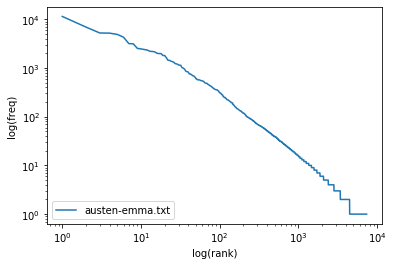

In [30]:
# plot loglog graph of rank versus frequency
ranks = range(1, len(freq_list)+1) # x-axis: ranks
freqs = [freq for (word, freq) in freq_list] # y-axis: frequencies

print('50th Elem Freq: ', freqs[50])
print('150th Elem Freq: ', freqs[150])
print('150th*3 ==> ', freqs[150] * 3)

plt.loglog(ranks, freqs, label='austen-emma.txt')
plt.xlabel('log(rank)')
plt.ylabel('log(freq)')
plt.legend(loc='lower left')

T:  192427
n:  7344
k:  20300.51373217429


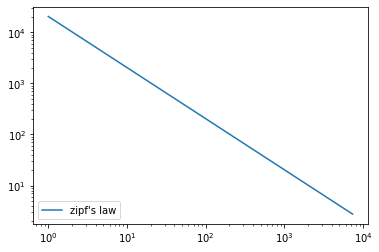

In [31]:
# plot zip law's expected value
# https://www.cs.swarthmore.edu/~richardw/classes/cs65/f18/lab01.html
def H_approx(n):
    """
    Returns an approximate value of n-th harmonic number
    http://en.wikipedia.org/wiki/Harmonic-number
    """
    # Euler-Mascheroni constant
    gamma = 0.57721566490153286060651209008240243104215933593992
    return gamma + math.log(n) + 0.5/n - 1./(12*n**2) + 1./(120*n**4)

T = len(words)
print('T: ', T)
vocab = set([word for (word, freq) in freq_list])
n = len(vocab)
print('n: ', n)
k = T/H_approx(n)
print('k: ', k)
expected_freq = [k/r for r in ranks]
plt.loglog(ranks, expected_freq, label="zipf's law")
plt.legend(loc='lower left')

plt.show()

# Exercise 4 of Week 1 Assignment

In [32]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

stop_words = stopwords.words('english')

In [33]:
def getHeapLawValues(corpus_name):
    '''
    Accepts nltk.corpus.gutenberg corpus name
    Calculated vocabulary (M) and total words (T)
    Returns M, T, M/T as a list
    '''
    words = nltk.Text(nltk.corpus.gutenberg.words(corpus_name))
    # normalize the words
    words = [w.lower() for w in words if w.isalpha()]
    # remove stop words
    words = [w for w in words if w not in stop_words]
    
    M = len(set(words))
    T = len(words)
    
    print(corpus_name, ' M: ', M, ' T: ', T, 'Ratio: ', M/T)
    return [M, T, M/T]

austen-emma.txt  M:  6948  T:  73149 Ratio:  0.09498421031046221
austen-persuasion.txt  M:  5606  T:  38337 Ratio:  0.1462294910921564
austen-sense.txt  M:  6148  T:  53986 Ratio:  0.11388137665320638
bible-kjv.txt  M:  12443  T:  374945 Ratio:  0.03318620064276094
blake-poems.txt  M:  1400  T:  3805 Ratio:  0.3679369250985545
bryant-stories.txt  M:  3688  T:  21718 Ratio:  0.16981305829266047
burgess-busterbrown.txt  M:  1382  T:  7582 Ratio:  0.18227380638353996
carroll-alice.txt  M:  2423  T:  12240 Ratio:  0.19795751633986927
chesterton-ball.txt  M:  8009  T:  39715 Ratio:  0.20166184061437745
chesterton-brown.txt  M:  7589  T:  35348 Ratio:  0.21469390064501528
chesterton-thursday.txt  M:  6159  T:  28328 Ratio:  0.21741739621575826
edgeworth-parents.txt  M:  8166  T:  78148 Ratio:  0.1044940369555203
melville-moby_dick.txt  M:  16802  T:  110459 Ratio:  0.15211073792085752
milton-paradise.txt  M:  8849  T:  45568 Ratio:  0.19419329353932585
shakespeare-caesar.txt  M:  2911  T:  1

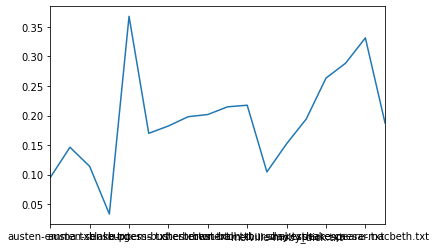

In [34]:
column_headers = ['M', 'T', 'Ratio']
df = pd.DataFrame(columns=column_headers)

for corpus in nltk.corpus.gutenberg.fileids():
    df.loc[corpus] = getHeapLawValues(corpus)
    
print(df)
#df.plot()
df.Ratio.plot()